In [31]:
# impots 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline



# Data Importing

In [32]:
data=pd.read_csv(r'E:\Dataset\Project\heart.csv',sep=',')

In [33]:
data.head(5)

,age,sex,chest_ Pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar > 120,resting_results,max_heart_rate,exercise_induced,previous_peak,Slope,no._of_major_vessels,thal_rate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

# Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                           303 non-null int64
sex                           303 non-null int64
chest_ Pain_type              303 non-null int64
resting_blood_pressure        303 non-null int64
cholestoral                   303 non-null int64
fasting_blood_sugar > 120     303 non-null int64
resting_results               303 non-null int64
max_heart_rate                303 non-null int64
exercise_induced              303 non-null int64
previous_peak                 303 non-null float64
Slope                         303 non-null int64
no._of_major_vessels          303 non-null int64
thal_rate                     303 non-null int64
output                        303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
data.isnull().sum()

age                           0
sex                           0
chest_ Pain_type              0
resting_blood_pressure        0
cholestoral                   0
fasting_blood_sugar > 120     0
resting_results               0
max_heart_rate                0
exercise_induced              0
previous_peak                 0
Slope                         0
no._of_major_vessels          0
thal_rate                     0
output                        0
dtype: int64

In [7]:
data.describe()

,age,sex,chest_ Pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar > 120,resting_results,max_heart_rate,exercise_induced,previous_peak,Slope,no._of_major_vessels,thal_rate,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data['output'].unique()

array([1, 0], dtype=int64)

In [9]:
#we can see that we have a small 303 rows data set. our data has no nulls and no other chars to represent it. all our data is numeric - therefore, no enumeration needed.

In [10]:
healthy = data[(data['output'] ==0) ].count()[1]
sick = data[(data['output'] ==1) ].count()[1]
print ("num of pepole without heart deacise: "+ str(healthy))
print ("num of pepole with chance for heart deacise: "+ str(sick))

num of pepole without heart deacise: 138
num of pepole with chance for heart deacise: 165


In [11]:
# we choose to splite 30-70 because we have a small data set and we want to have enught validetionn examples.
# split data table into data X and class labels y

X = data.iloc[:,0:13].values
y = data.iloc[:,13].values
#nurmalize the data
X_std = StandardScaler().fit_transform(X)
dataNorm = pd.DataFrame(X_std, index=data.index, columns=data.columns[0:13])
# # add non-feature target column to dataframe
dataNorm['output'] = data['output']
dataNorm.head(10)

X = dataNorm.iloc[:,0:13].values
y = dataNorm.iloc[:,13].values

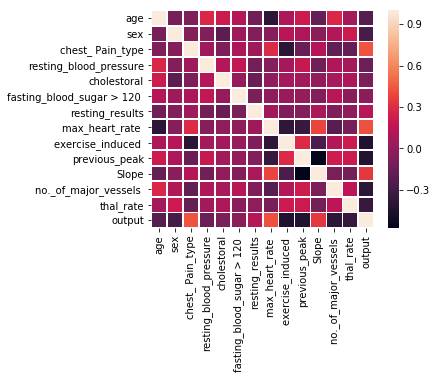

In [12]:
 # calculate the correlation matrix
corr = dataNorm.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

# Data Visualisation

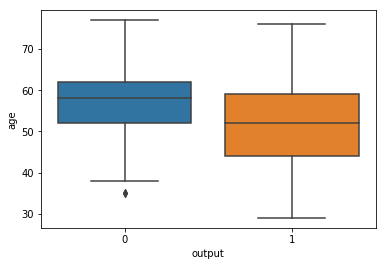

In [13]:
#To print the range of people who have chances and also don't have chances to get heart attack
sns.boxplot(x='output',y='age', data=data)
plt.show()

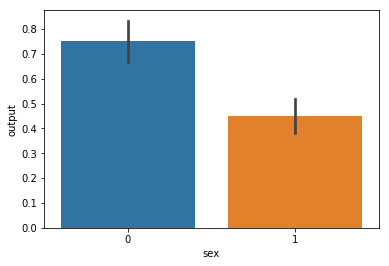

In [14]:
#To see the range of heart attack according to gender of people(0=female, 1=male)
sns.barplot(x="sex",y="output", data=data)

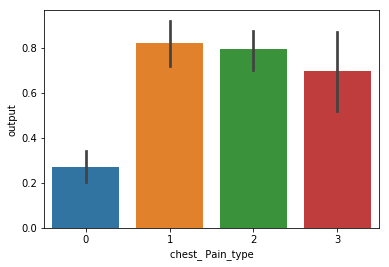

In [15]:
#To see the ranges of chest_pain_type which will show which chest_pain_type affected the most for getting heart-attack
sns.barplot(x="chest_ Pain_type",y="output", data=data)

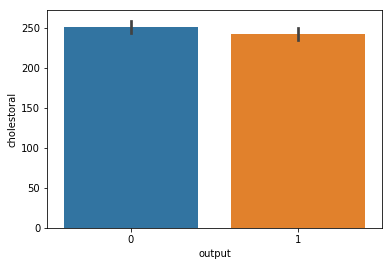

In [16]:
#To show how much cholestrol affect the targeted column
sns.barplot(x="output",y="cholestoral", data=data)

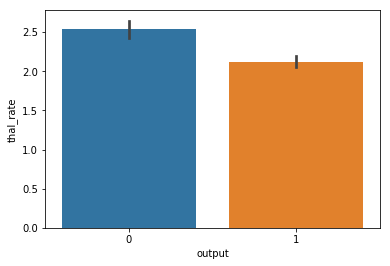

In [17]:
#To show how much thal_rate affect the targeted column
sns.barplot(x="output",y="thal_rate", data=data)

The precentage of 0 class is : 0.01
The precentage of 1 class is: 0.06
The precentage of 2 class is: 0.55
The precentage of 3 class is: 0.39


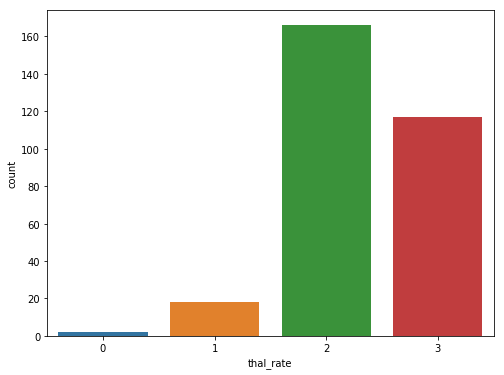

In [18]:
#To see the percentages of thal_rate values
plt.figure(figsize=(8,6))
sns.countplot(data['thal_rate'])
print('The precentage of 0 class is : %.2f' % (data['thal_rate'].value_counts()[0]/len(data)))
print('The precentage of 1 class is: %.2f' % (data['thal_rate'].value_counts()[1]/len(data)))
print('The precentage of 2 class is: %.2f' % (data['thal_rate'].value_counts()[2]/len(data)))
print('The precentage of 3 class is: %.2f' % (data['thal_rate'].value_counts()[3]/len(data)))

The precentage of 0 class is : 0.49
The precentage of 1 class is: 0.50
The precentage of 2 class is: 0.01


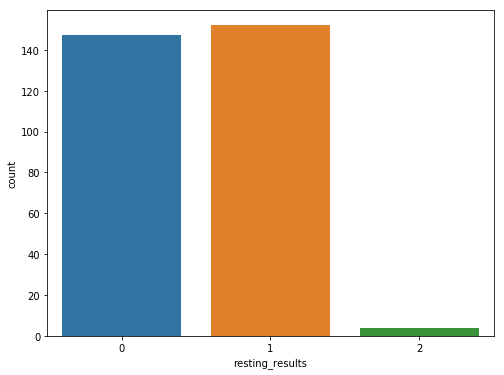

In [19]:
#To see the percentages of resting_results values
plt.figure(figsize=(8,6))
sns.countplot(data['resting_results'])
print('The precentage of 0 class is : %.2f' % (data['resting_results'].value_counts()[0]/len(data)))
print('The precentage of 1 class is: %.2f' % (data['resting_results'].value_counts()[1]/len(data)))
print('The precentage of 2 class is: %.2f' % (data['resting_results'].value_counts()[2]/len(data)))

In [22]:
data['chest_ Pain_type'].unique()

array([3, 2, 1, 0], dtype=int64)

The precentage of 0 class is : 0.47
The precentage of 1 class is: 0.17
The precentage of 2 class is: 0.29
The precentage of 2 class is: 0.08


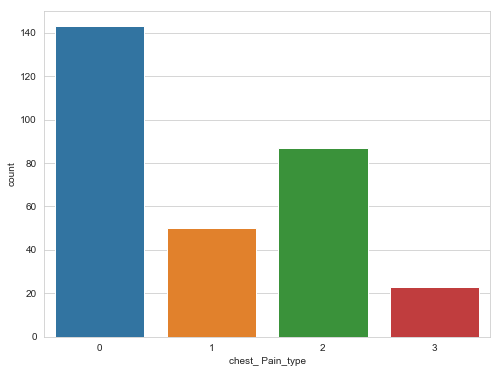

In [40]:
#To see the percentages of chest_ Pain_type values who may affect heart attack
plt.figure(figsize=(8,6))
sns.countplot(data['chest_ Pain_type'])
print('The precentage of 0 class is : %.2f' % (data['chest_ Pain_type'].value_counts()[0]/len(data)))
print('The precentage of 1 class is: %.2f' % (data['chest_ Pain_type'].value_counts()[1]/len(data)))
print('The precentage of 2 class is: %.2f' % (data['chest_ Pain_type'].value_counts()[2]/len(data)))
print('The precentage of 2 class is: %.2f' % (data['chest_ Pain_type'].value_counts()[3]/len(data)))

C:\Users\Shri\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


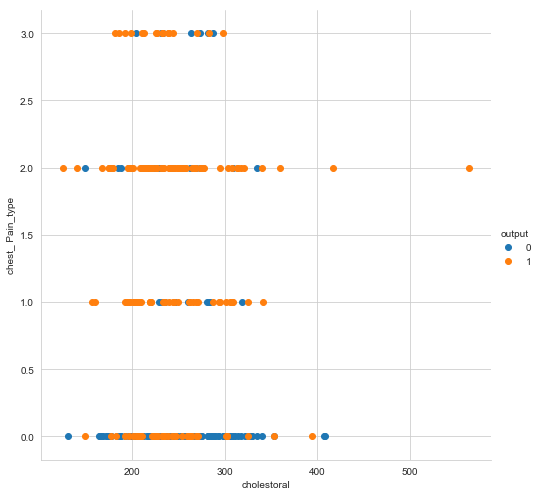

In [26]:
#To see how chest_ Pain_type and cholestrol is affected on targeted 'output' 
sns.set_style('whitegrid');
sns.FacetGrid(data,hue='output',size=7) \
.map(plt.scatter,'cholestoral','chest_ Pain_type') \
.add_legend();
plt.show()

# Data Modelling

In [29]:
#data splitting 
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
x=data.drop('output',axis=1)
y=data['output']
scaler.fit(x)
x_transformed=scaler.transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.3)

C:\Users\Shri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [34]:
#SVM
model=SVC()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred=model.predict(x_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationREport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:92.45283018867924
Test Set Accuracy:92.45283018867924

Confusion Matrix:
[[27  6]
 [ 9 49]]

ClassificationREport:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.89      0.84      0.87        58

   micro avg       0.84      0.84      0.84        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.84      0.84      0.84        91



C:\Users\Shri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
#KNN
features = data.drop('output', axis=1)
target = data['output']

In [36]:
scale = StandardScaler()

In [37]:
scale.fit(features)

C:\Users\Shri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
scaled_features=scale.transform(features)

C:\Users\Shri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [39]:
data_new = pd.DataFrame(scaled_features)
data_new.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922


In [12]:
#Model training using KNN
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_new,target,test_size=0.25, random_state=45)

In [13]:
x_train.shape

(227, 13)

In [14]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
289,0.069886,-1.468418,-0.938515,-0.206964,-0.797447,-0.417635,2.803756,-0.859167,1.435481,0.828529,-0.649113,0.265082,1.123029
219,-0.702136,0.681005,-0.938515,-0.092738,0.188152,2.394438,-1.005832,0.015443,1.435481,-0.896862,0.976352,1.244593,1.123029
10,-0.040403,0.681005,-0.938515,0.478391,-0.140381,-0.417635,0.898962,0.452748,-0.696631,0.138373,0.976352,-0.714429,-0.512922
164,-1.805024,0.681005,1.002577,0.364165,-1.377212,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,3.203615,-0.512922
200,-1.143291,0.681005,-0.938515,-1.234996,-0.952051,-0.417635,-1.005832,1.196166,-0.696631,-0.896862,0.976352,0.265082,-0.512922


In [15]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [16]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
predictions = model.predict(x_test)
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
104,-0.481558,0.681005,1.002577,-0.149851,-0.971377,-0.417635,0.898962,0.583939,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
100,-1.363869,0.681005,1.973123,0.935294,-0.043753,-0.417635,-1.005832,1.239897,-0.696631,-0.206705,0.976352,1.244593,-0.512922
125,-2.246179,-1.468418,0.032031,-0.778093,-0.700820,-0.417635,0.898962,1.852124,-0.696631,-0.292975,0.976352,-0.714429,-0.512922
69,0.841908,-1.468418,-0.938515,-0.435415,-0.720145,-0.417635,0.898962,0.583939,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
83,-0.260980,0.681005,1.973123,1.163746,0.999823,2.394438,0.898962,1.239897,-0.696631,0.138373,-0.649113,-0.714429,1.123029


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        30
           1       0.84      0.78      0.81        46

   micro avg       0.78      0.78      0.78        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



In [19]:
print('Accuracy:',model.score(x_test,y_test)*100, '%')

Accuracy: 77.63157894736842 %


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[23,  7],
       [10, 36]], dtype=int64)

In [21]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
#model training
model.fit(x_train,y_train)

C:\Users\Shri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
#print metric to get performance
print('Accuracy:',model.score(x_test,y_test)*100)

Accuracy: 84.21052631578947


In [26]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(data.drop(['output'],axis=1), 
                                                    data['output'], test_size=0.20, 
                                                    random_state=8)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

42.03471417661293 %


In [29]:
#droping target variable to make unlabelled data for kmeans use
data.drop(['output'], axis =1, inplace=True)
data.head()

,age,sex,chest_ Pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar > 120,resting_results,max_heart_rate,exercise_induced,previous_peak,Slope,no._of_major_vessels,thal_rate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
data.isnull().sum()

age                           0
sex                           0
chest_ Pain_type              0
resting_blood_pressure        0
cholestoral                   0
fasting_blood_sugar > 120     0
resting_results               0
max_heart_rate                0
exercise_induced              0
previous_peak                 0
Slope                         0
no._of_major_vessels          0
thal_rate                     0
dtype: int64